Ian Mulchrone, Miguel Saucedo, Shyamkumar Moradiya, Ava Roelle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Data Preprocessing & Feature Engineering
Shyamkumar Moradiya

In this task, I focused on preparing the dataset by cleaning it and creating new features to enhance the quality of our analysis. The goal was to ensure that the data fed into our models is as informative and consistent as possible, which helps improve the accuracy of genre classification, popularity prediction, and the recommendation system.

In [2]:
spotify = pd.read_csv('spotify.csv', index_col=0)
spotify.head()
print("Data loaded. Shape:", spotify.shape)


Data loaded. Shape: (114000, 20)


In [3]:
# Initial Exploration
spotify_info = {
    "shape": spotify.shape,
    "missing_values": spotify.isna().sum().sort_values(ascending=False)
}

In [4]:
 # Handle missing values
spotify.dropna(inplace=True)

In [5]:
# Encode 'explicit' as binary if not already
if spotify['explicit'].dtype == 'bool':
    spotify['explicit'] = spotify['explicit'].astype(int)

In [6]:
# Feature Engineering
spotify['energy_dance_ratio'] = spotify['energy'] / (spotify['danceability'] + 1e-5)
spotify['loudness_per_min'] = spotify['loudness'] / ((spotify['duration_ms'] / 60000) + 1e-5)
spotify['tempo_valence_product'] = spotify['tempo'] * spotify['valence']
spotify['acoustic_energy_ratio'] = spotify['acousticness'] / (spotify['energy'] + 1e-5)
spotify['duration_mins'] = spotify['duration_ms'] / 60000

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Normalize new features
features_to_scale = ['energy_dance_ratio', 'loudness_per_min', 'tempo_valence_product',
                     'acoustic_energy_ratio', 'duration_mins']


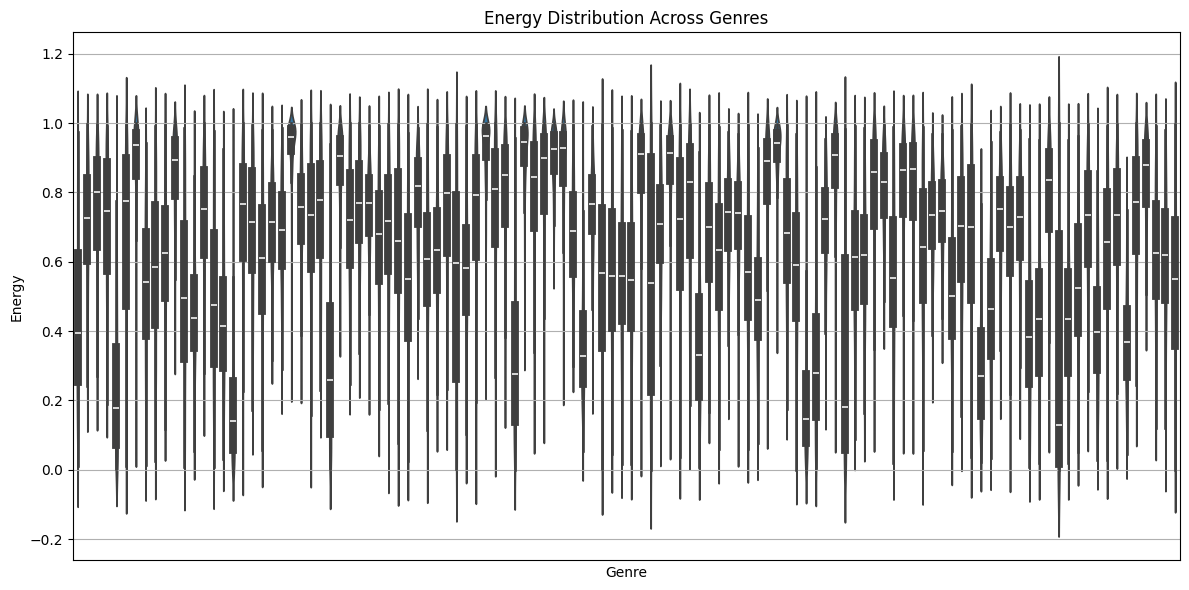

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Energy by genre
plt.figure(figsize=(12, 6))
sns.violinplot(x='track_genre', y='energy', data=spotify)
plt.title('Energy Distribution Across Genres')
plt.xlabel("Genre")
plt.ylabel("Energy")
plt.xticks([], [])  # Hide labels if too many genres
plt.grid(True)
plt.tight_layout()
plt.show()

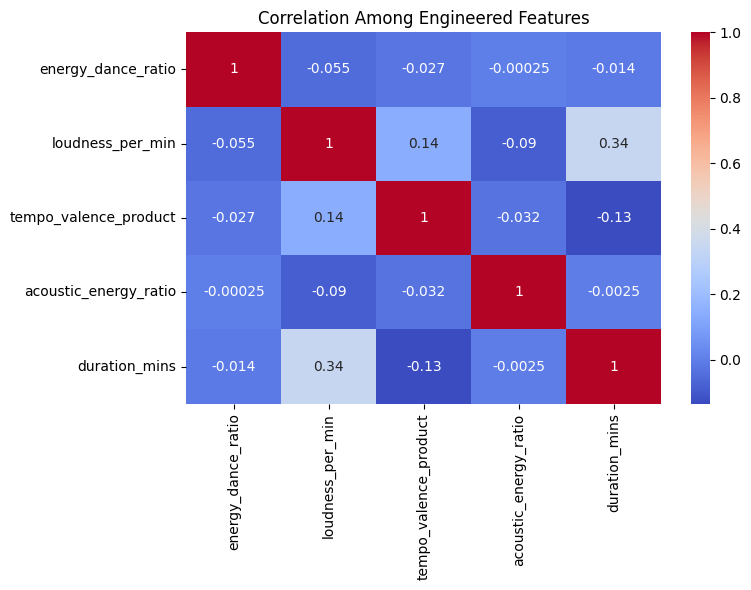

In [9]:
# Correlation heatmap for engineered features
plt.figure(figsize=(8, 6))
corr = spotify[features_to_scale].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Among Engineered Features')
plt.tight_layout()
plt.show()

## Preprocessing Part 2
Creating dummy variables, normalization through decimal point scaling, and creating numeric values for each genre so that genre can be in similarity calculations.

Ian Mulchrone

We want to preserve the negative values in 'loudness' so we will use decimal point scaling.

In [64]:
numeric_cols = ['popularity', 'duration_ms', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']
spotify_scaled = spotify.copy()
spotify_scaled = spotify_scaled.drop(columns=['energy_dance_ratio', 'loudness_per_min', 'tempo_valence_product',
                     'acoustic_energy_ratio', 'duration_mins'])
for col in numeric_cols:
    max_abs = spotify_scaled[col].abs().max()
    j = int(np.ceil(np.log10(max_abs + 1e-10)))
    spotify_scaled[col] = spotify_scaled[col] / (10 ** j)

In [65]:
spotify_scaled.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0.073,0.023067,0,0.676,0.04610,1,-0.06746,0.0,0.1430,0.0322,1.010000e-07,0.03580,0.715,0.087917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.055,0.014961,0,0.420,0.01660,1,-0.17235,0.1,0.0763,0.9240,5.560000e-07,0.01010,0.267,0.077489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.057,0.021083,0,0.438,0.03590,0,-0.09734,0.1,0.0557,0.2100,0.000000e+00,0.01170,0.120,0.076332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.071,0.020193,0,0.266,0.00596,0,-0.18515,0.1,0.0363,0.9050,7.070000e-06,0.01320,0.143,0.181740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,0.082,0.019885,0,0.618,0.04430,2,-0.09681,0.1,0.0526,0.4690,0.000000e+00,0.00829,0.167,0.119949,4,acoustic



Now, we need to create dummy variables for 'key' and 'time_signature' and convert boolean values to numeric.

In [72]:
spotify_d = spotify_scaled.copy()
spotify_d = pd.get_dummies(spotify_d, columns=['key','time_signature'])

In [73]:
for col in spotify_d.columns:
    if spotify_d[col].dtype == bool:
        spotify_d[col] = spotify_d[col].astype(int)

In [74]:
spotify_d.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,...,key_7,key_8,key_9,key_10,key_11,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0.073,0.023067,0,0.676,0.04610,-0.06746,...,0,0,0,0,0,0,0,0,1,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.055,0.014961,0,0.420,0.01660,-0.17235,...,0,0,0,0,0,0,0,0,1,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.057,0.021083,0,0.438,0.03590,-0.09734,...,0,0,0,0,0,0,0,0,1,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.071,0.020193,0,0.266,0.00596,-0.18515,...,0,0,0,0,0,0,0,1,0,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,0.082,0.019885,0,0.618,0.04430,-0.09681,...,0,0,0,0,0,0,0,0,1,0


In [75]:
genres = spotify['track_genre'].unique().tolist()

Calculate centroids for each genre.

In [76]:
centroids = spotify_d.groupby('track_genre').mean(numeric_only=True)
centroids.head()

,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,key_7,key_8,key_9,key_10,key_11,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
track_genre,,,,,,,,,,,,,,,,,,,,,
acoustic,0.042483,0.021490,0.052,0.549593,0.043537,-0.094478,0.0816,0.043247,0.566816,0.003834,...,0.129,0.054,0.097,0.063,0.069,0.000,0.009,0.101,0.877,0.013
afrobeat,0.024399,0.024841,0.018,0.669580,0.070281,-0.077894,0.0511,0.086579,0.270860,0.025348,...,0.140,0.055,0.095,0.065,0.092,0.000,0.005,0.052,0.930,0.013
alt-rock,0.033943,0.023546,0.056,0.534493,0.075417,-0.061915,0.0641,0.055071,0.122162,0.005410,...,0.103,0.084,0.120,0.049,0.115,0.001,0.001,0.056,0.940,0.002
alternative,0.024337,0.022202,0.164,0.559927,0.072003,-0.060788,0.0606,0.070101,0.147820,0.003816,...,0.075,0.078,0.122,0.054,0.115,0.000,0.002,0.064,0.922,0.012
ambient,0.044191,0.023706,0.005,0.367867,0.023716,-0.186014,0.0620,0.041562,0.776790,0.067622,...,0.109,0.054,0.091,0.066,0.053,0.003,0.039,0.264,0.648,0.046


Perform PCA on the centroids.

In [77]:
pca = PCA(n_components=2)
centroids_pca = pca.fit_transform(centroids)

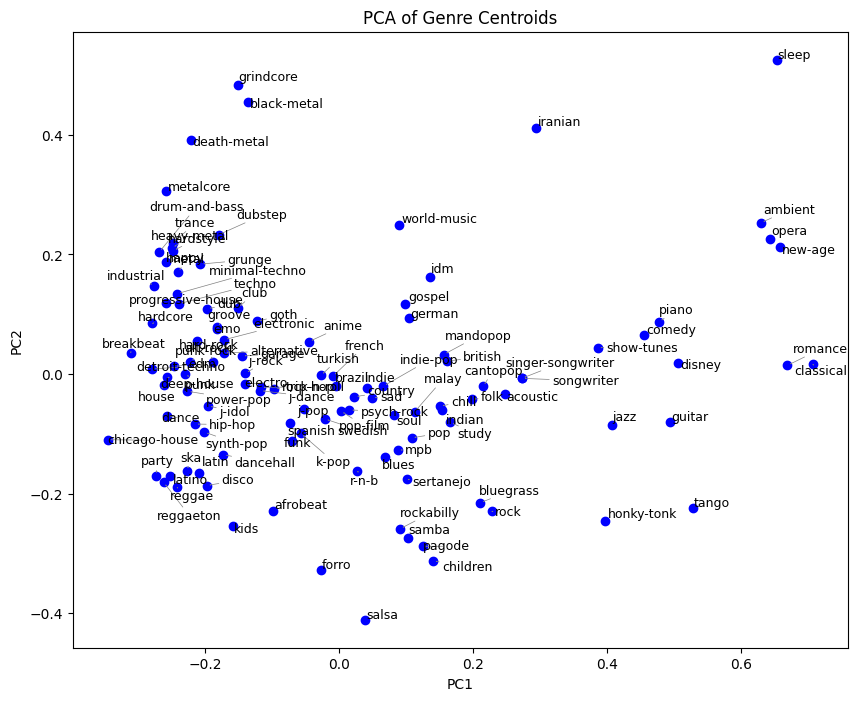

In [78]:
from adjustText import adjust_text
fig, ax = plt.subplots(figsize=(10, 8))
texts = []

for i in range(len(centroids_pca)):
    x = centroids_pca[i][0]
    y = centroids_pca[i][1]
    ax.scatter(x, y, color='blue')
    texts.append(ax.text(x, y, genres[i], fontsize=9))

adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

plt.title('PCA of Genre Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Performing PCA on the genre centroids allows for the genres to be included in the similarity calculations. The left side of the plot consists of more loud, high-tempo genres, while the right side is more relaxing and less noisy.

In [79]:
genre_pca1 = {genres[i]: centroids_pca[i][0] for i in range(len(centroids_pca))}
genre_pca2 = {genres[i]: centroids_pca[i][1] for i in range(len(centroids_pca))}
spotify_pca = spotify_d.copy()
spotify_pca['genre_pca1'] = spotify_pca['track_genre'].map(genre_pca1)
spotify_pca['genre_pca2'] = spotify_pca['track_genre'].map(genre_pca2)

# Task 2 - Classification
Ava Roelle

Transform popularity features into categories for classification models

In [20]:
spotify_d['popularity'].quantile([0.33, 0.66])

0.33    0.022
0.66    0.044
Name: popularity, dtype: float64

In [21]:
spotify_d['popularity_cat'] = pd.cut(spotify_d['popularity'],
                                     bins=[-0.01, 0.022, 0.044, 0.12],
                                     labels=['Low', 'Medium', 'High'])
spotify_d = spotify_d.drop(columns=['popularity'])

Use only continuous and dummy encoded categorical features

In [22]:
relevant_features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo'
]
existing_dummies = [col for col in spotify_d.columns if col.startswith('key_') or col.startswith('time_signature_')]
X = spotify_d[relevant_features + existing_dummies]
y = spotify_d['popularity_cat']

Train/test split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)

KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

knn_params = {'n_neighbors': [3, 5, 7, 9]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)

print("Best KNN Params:", knn_grid.best_params_)
print("Best KNN CV Score:", knn_grid.best_score_)
print("KNN Report:\n", classification_report(y_test, knn_grid.predict(X_test)))

Best KNN Params: {'n_neighbors': 3}
Best KNN CV Score: 0.5223083379744388
KNN Report:
               precision    recall  f1-score   support

        High       0.50      0.64      0.56      7689
         Low       0.63      0.57      0.60      7775
      Medium       0.52      0.42      0.46      7336

    accuracy                           0.55     22800
   macro avg       0.55      0.54      0.54     22800
weighted avg       0.55      0.55      0.54     22800



Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=123), rf_params, cv=5)
rf_grid.fit(X_train, y_train)

print("Best RF Params:", rf_grid.best_params_)
print("Best RF CV Score:", rf_grid.best_score_)
print("Random Forest Report:\n", classification_report(y_test, rf_grid.predict(X_test)))

Best RF Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best RF CV Score: 0.6682420105653684
Random Forest Report:
               precision    recall  f1-score   support

        High       0.68      0.71      0.69      7689
         Low       0.76      0.72      0.74      7775
      Medium       0.63      0.63      0.63      7336

    accuracy                           0.69     22800
   macro avg       0.69      0.69      0.69     22800
weighted avg       0.69      0.69      0.69     22800



Plot feature importance from best RF model

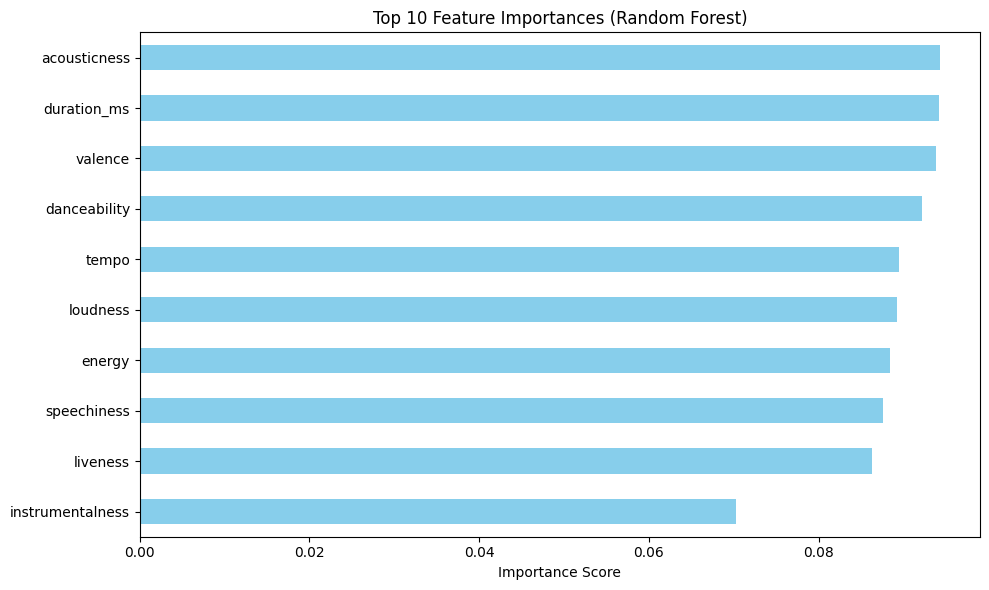

In [26]:
import matplotlib.pyplot as plt
importances = rf_grid.best_estimator_.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feat_imp[:10].plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

Generate confusion matrix for best RF model

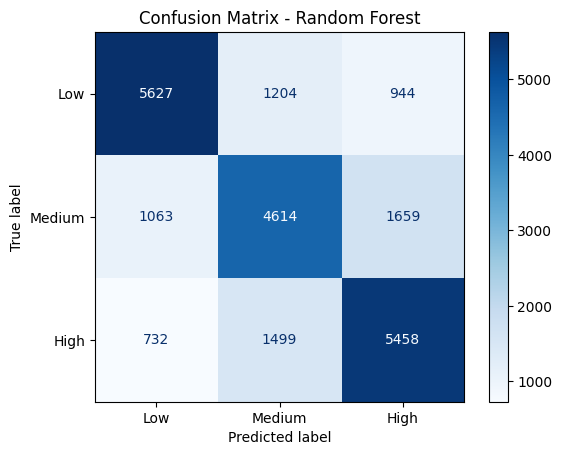

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_rf = rf_grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf, labels=['Low', 'Medium', 'High'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2']
}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5)
lr_grid.fit(X_train, y_train)

print("Best LR Params:", lr_grid.best_params_)
print("Best LR CV Score:", lr_grid.best_score_)
print("Logistic Regression Report:\n", classification_report(y_test, lr_grid.predict(X_test)))

Best LR Params: {'C': 10, 'penalty': 'l2'}
Best LR CV Score: 0.43025693929434033
Logistic Regression Report:
               precision    recall  f1-score   support

        High       0.42      0.51      0.46      7689
         Low       0.42      0.40      0.41      7775
      Medium       0.43      0.36      0.39      7336

    accuracy                           0.42     22800
   macro avg       0.42      0.42      0.42     22800
weighted avg       0.42      0.42      0.42     22800



# Task 3 - Regression

Miguel Saucedo

Within the regression task, tested with two different data sets to determine the influence of artists and track genre on predicting song popularity.

In [29]:
spotify_df = pd.read_csv('spotify.csv', index_col=0)
spotify_df.head()
# Load the data set

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [30]:
spotify_df['explicit'] = spotify_df['explicit'].astype(int) # changed boolean to integer (0/1)
print(spotify_df.isnull().sum()) # Look for missing values
spotify_df.dropna(inplace=True)

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [31]:
spotify_df = spotify_df.drop(columns=['track_id', 'album_name', 'track_name']) # Dropped these 3 features

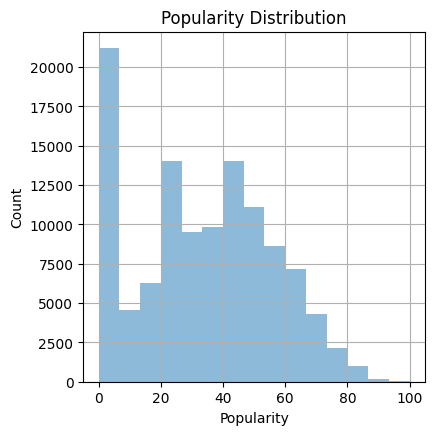

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(231)
plt.hist(spotify_df["popularity"], bins=15, alpha=0.5)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Popularity Distribution')
plt.grid(True) # Look into the

In [33]:
spotify_df_wo = spotify_df.copy() # Created a new data set which will be used to compare data with and without the two features (artists and track genre)
spotify_df_wo_corr = spotify_df.drop(columns=['artists', 'track_genre'])
spotify_df_wo_corr.corr()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.007129,0.044078,0.035444,0.001053,-0.003847,0.050420,-0.013948,-0.044930,-0.025458,-0.095147,-0.005397,-0.040522,0.013212,0.031076
duration_ms,-0.007129,1.000000,-0.065270,-0.073435,0.058520,0.008123,-0.003475,-0.035581,-0.062605,-0.103770,0.124364,0.010308,-0.154464,0.024356,0.018229
explicit,0.044078,-0.065270,1.000000,0.122506,0.096954,0.004485,0.108587,-0.037216,0.307951,-0.094400,-0.103405,0.032547,-0.003378,-0.002815,0.038387
danceability,0.035444,-0.073435,0.122506,1.000000,0.134325,0.036470,0.259076,-0.069224,0.108625,-0.171531,-0.185608,-0.131620,0.477347,-0.050448,0.207219
energy,0.001053,0.058520,0.096954,0.134325,1.000000,0.048007,0.761690,-0.078365,0.142508,-0.733908,-0.181880,0.184795,0.258937,0.247852,0.187127
key,-0.003847,0.008123,0.004485,0.036470,0.048007,1.000000,0.038591,-0.135911,0.020419,-0.040942,-0.006821,-0.001597,0.034099,0.010914,0.015064
loudness,0.050420,-0.003475,0.108587,0.259076,0.761690,0.038591,1.000000,-0.041768,0.060826,-0.589804,-0.433478,0.076897,0.279851,0.212447,0.191992
mode,-0.013948,-0.035581,-0.037216,-0.069224,-0.078365,-0.135911,-0.041768,1.000000,-0.046535,0.095568,-0.049961,0.014004,0.021964,0.000572,-0.024090
speechiness,-0.044930,-0.062605,0.307951,0.108625,0.142508,0.020419,0.060826,-0.046535,1.000000,-0.002184,-0.089617,0.205218,0.036637,0.017274,-0.000011
acousticness,-0.025458,-0.103770,-0.094400,-0.171531,-0.733908,-0.040942,-0.589804,0.095568,-0.002184,1.000000,0.104033,-0.020693,-0.107081,-0.208231,-0.176142


In [34]:
y_with = spotify_df['popularity'] # target variable
x_with = spotify_df.drop(columns=['popularity']) # data set with artists and track_genre
y_wo = spotify_df_wo['popularity'] # target variable
x_wo = spotify_df_wo.drop(columns=['popularity', 'track_genre', 'artists']) # data set without artists and track_genre

In [35]:
from sklearn.model_selection import train_test_split
x_with_train, x_with_test, y_with_train, y_with_test = train_test_split(x_with, y_with, test_size=0.2, random_state=42)
x_wo_train, x_wo_test, y_wo_train, y_wo_test = train_test_split(x_wo, y_wo, test_size = 0.2, random_state= 42)

In [36]:
artist_avg_pop = x_with_train.join(y_with_train)['popularity'].groupby(x_with_train['artists']).mean().to_dict()
x_with_train['artist_avg_popularity'] = x_with_train['artists'].map(artist_avg_pop)
x_with_test['artist_avg_popularity'] = x_with_test['artists'].map(artist_avg_pop)

genre_avg_pop = x_with_train.join(y_with_train)['popularity'].groupby(x_with_train['track_genre']).mean().to_dict()
x_with_train['genre_avg_popularity'] = x_with_train['track_genre'].map(genre_avg_pop)
x_with_test['genre_avg_popularity'] = x_with_test['track_genre'].map(genre_avg_pop)
 # Created two new features within the the x train and x test data of popularity average of each artists and track genre

missing_indices = x_with_test['artists'].isna()
x_with_test = x_with_test[~missing_indices]
x_wo_test = x_wo_test[~missing_indices]
y_with_test = y_with_test[~missing_indices]

Created a new column of average popularity within artists to work with numerical values instead of categorical. <br>
We are only computing the average popularity of artists from the training set. <br>
Since there were some artists that were listed as "Unknown" in the data, I decided to get rid of it as a large portion of data is still available.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [38]:
x_with_train.drop(columns=['artists'], inplace=True)
x_with_test.drop(columns=['artists'], inplace=True)
x_with_train.drop(columns=['track_genre'], inplace=True)
x_with_test.drop(columns=['track_genre'], inplace=True) # Dropped the categorical features for both test and train set

In [39]:
scaler = StandardScaler()
x_with_train_scaled = scaler.fit_transform(x_with_train)
x_with_test_scaled = scaler.transform(x_with_test) # Normalized the data to get rid of any outliers and change values with high values such as
# duration, tempo, and average popularity based on each artists
x_with_train_scaled = pd.DataFrame(x_with_train_scaled, columns=x_with_train.columns, index=x_with_train.index)
x_with_test_scaled = pd.DataFrame(x_with_test_scaled, columns=x_with_test.columns, index=x_with_test.index)
missing_indices = x_with_test_scaled['artist_avg_popularity'].isna()
x_with_test_scaled = x_with_test_scaled[~missing_indices]
x_with_test = x_with_test[~missing_indices]
y_with_test = y_with_test[~missing_indices] # within my test data set, there were missing values due to unknown artists, however decided to drop them

Regression task on data set with both features

In [40]:
# Linear Regression
linreg = LinearRegression()
linreg.fit(x_with_train_scaled, y_with_train)
pred_lr = linreg.predict(x_with_test_scaled)

# KNN
knn = KNeighborsRegressor(n_neighbors=3 ) # I changed the number of neighbors, but 3 returned the best results at the end
knn.fit(x_with_train_scaled, y_with_train)
pred_knn = knn.predict(x_with_test_scaled)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_with_train, y_with_train)
pred_dt = dt.predict(x_with_test)

# Random Forest
rf = RandomForestRegressor()
rf.fit(x_with_train, y_with_train)
pred_rf = rf.predict(x_with_test)

In [41]:
rmse_lr = root_mean_squared_error(y_with_test, pred_lr)
r2_lr = r2_score(y_with_test, pred_lr)
cv_lr = cross_val_score(linreg, x_with_train_scaled, y_with_train, cv=5, scoring='neg_root_mean_squared_error')
rmse_cv_lr = -np.mean(cv_lr)

rmse_knn = root_mean_squared_error(y_with_test, pred_knn)
r2_knn = r2_score(y_with_test, pred_knn)
cv_knn = cross_val_score(knn, x_with_train_scaled, y_with_train, cv=5, scoring='neg_root_mean_squared_error')
rmse_cv_knn = -np.mean(cv_knn)

rmse_dt = root_mean_squared_error(y_with_test, pred_dt)
r2_dt = r2_score(y_with_test, pred_dt)
cv_dt = cross_val_score(dt, x_with_train_scaled, y_with_train, cv=5, scoring='neg_root_mean_squared_error')
rmse_cv_dt = -np.mean(cv_dt)

rmse_rf = root_mean_squared_error(y_with_test, pred_rf)
r2_rf = r2_score(y_with_test, pred_rf)
cv_rf = cross_val_score(rf, x_with_train_scaled, y_with_train, cv=5, scoring='neg_root_mean_squared_error')
rmse_cv_rf = -np.mean(cv_rf)

print("RMSE: (Linear Regression)", rmse_lr)
print("R² Score: (Linear Regression)", r2_lr)
print("CV Score (Linear Regression):", rmse_cv_lr)
print("\n")
print("RMSE (KNN):", rmse_knn)
print("R² Score (KNN):", r2_knn)
print("CV Score (KNN):", rmse_cv_knn)
print("\n")
print("RMSE (Decision Tree):", rmse_dt)
print("R² Score (Decision Tree):", r2_dt)
print("CV Score (Decision Tree):", rmse_cv_dt)
print("\n")
print("RMSE (Random Forest):", rmse_rf)
print("R² Score (Random Forest):", r2_rf)
print("CV Score (Random Forest):", rmse_cv_rf)

RMSE: (Linear Regression) 14.142367571691315
R² Score: (Linear Regression) 0.6207920139544596
CV Score (Linear Regression): 11.36400641518382


RMSE (KNN): 14.33458652697102
R² Score (KNN): 0.6104137913626342
CV Score (KNN): 13.024930215013459


RMSE (Decision Tree): 15.179642902986616
R² Score (Decision Tree): 0.5631258546270372
CV Score (Decision Tree): 14.074865477486577


RMSE (Random Forest): 12.340887456542287
R² Score (Random Forest): 0.7112473244873287
CV Score (Random Forest): 10.605994781009755


Regression Task using the data without the two features

In [42]:
scaler = StandardScaler()
x_wo_train_scaled = scaler.fit_transform(x_wo_train)
x_wo_test_scaled = scaler.transform(x_wo_test) # Normalized the data to get rid of any outliers and change values with high values such as
# duration, tempo
x_wo_train_scaled = pd.DataFrame(x_wo_train_scaled, columns=x_wo_train.columns, index=x_wo_train.index)
x_wo_test_scaled = pd.DataFrame(x_wo_test_scaled, columns=x_wo_test.columns, index=x_wo_test.index)

In [43]:
# Linear Regression
linreg = LinearRegression()
linreg.fit(x_wo_train_scaled, y_wo_train)
pred_lr = linreg.predict(x_wo_test_scaled)

# KNN
knn = KNeighborsRegressor(n_neighbors=3) # I changed the number of neighbors, but 3 returned the best results at the end
knn.fit(x_wo_train_scaled, y_wo_train)
pred_knn = knn.predict(x_wo_test_scaled)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_wo_train, y_wo_train)
pred_dt = dt.predict(x_wo_test)

# Random Forest
rf = RandomForestRegressor()
rf.fit(x_wo_train, y_wo_train)
pred_rf = rf.predict(x_wo_test)

In [44]:
rmse_lr = root_mean_squared_error(y_wo_test, pred_lr)
r2_lr = r2_score(y_wo_test, pred_lr)
cv_lr = cross_val_score(linreg, x_wo_train_scaled, y_wo_train, cv=5, scoring='neg_root_mean_squared_error')
rmse_cv_lr = -np.mean(cv_lr)

rmse_knn = root_mean_squared_error(y_wo_test, pred_knn)
r2_knn = r2_score(y_wo_test, pred_knn)
cv_knn = cross_val_score(knn, x_wo_train_scaled, y_wo_train, cv=5, scoring='neg_root_mean_squared_error')
rmse_cv_knn = -np.mean(cv_knn)

rmse_dt = root_mean_squared_error(y_wo_test, pred_dt)
r2_dt = r2_score(y_wo_test, pred_dt)
cv_dt = cross_val_score(dt, x_wo_train, y_wo_train, cv=5, scoring='neg_root_mean_squared_error')
rmse_cv_dt = -np.mean(cv_dt)

rmse_rf = root_mean_squared_error(y_wo_test, pred_rf)
r2_rf = r2_score(y_wo_test, pred_rf)
cv_rf = cross_val_score(rf, x_wo_train, y_wo_train, cv=5, scoring='neg_root_mean_squared_error')
rmse_cv_rf = -np.mean(cv_rf)

print("RMSE (Linear Regression):", rmse_lr)
print("R² Score (Linear Regression):", r2_lr)
print("CV Score (Linear Regression):", rmse_cv_lr)
print("\n")
print("RMSE (KNN):", rmse_knn)
print("R² Score (KNN):", r2_knn)
print("CV Score (KNN):", rmse_cv_knn)
print("\n")
print("RMSE (Decision Tree):", rmse_dt)
print("R² Score (Decision Tree):", r2_dt)
print("CV Score (Decision Tree):", rmse_cv_dt)
print("\n")
print("RMSE (Random Forest):", rmse_rf)
print("R² Score (Random Forest):", r2_rf)
print("CV Score (Random Forest):", rmse_cv_rf)

RMSE (Linear Regression): 22.03413899451539
R² Score (Linear Regression): 0.02133928016594755
CV Score (Linear Regression): 22.026012876873672


RMSE (KNN): 19.687159384720186
R² Score (KNN): 0.2187210869215338
CV Score (KNN): 20.35607029045846


RMSE (Decision Tree): 20.489049220672577
R² Score (Decision Tree): 0.15377938779415445
CV Score (Decision Tree): 21.868779124397093


RMSE (Random Forest): 14.894167845522864
R² Score (Random Forest): 0.5528301895842294
CV Score (Random Forest): 15.7050185692259


# Task 4 - Recommender System
Ian Mulchrone

Create cosine and euclidean similarity functions.

In [45]:
def cosine_sim(x,y):
    x = np.asarray(x)
    y = np.asarray(y)
    x_norm = np.linalg.norm(x)
    y_norm = np.linalg.norm(y)
    if x_norm == 0 or y_norm == 0:
        return np.nan
    sims = np.dot(x,y)/(x_norm * y_norm)
    return sims

In [46]:
def euclidean_sim(a, b):
    a = np.asarray(a)
    b = np.asarray(b)
    dist = np.linalg.norm(a - b)
    return 1 / (1 + dist)

Sample songs used for testing.

In [80]:
sample = [25507, 47004, 16350, 81124, 101091]
songs_sample = spotify_pca.loc[sample]

Create a playlist of n length based on a list of songs listened to by the user and a given similarity function.

In [48]:
def make_playlist(user_songs, songs_df, n=0, sim_measure=cosine_sim, match_genre=True, features='all'):
    if features=='all':
        if match_genre:
            user_genres = user_songs['track_genre'].unique().tolist()
            songs_df = songs_df.loc[songs_df['track_genre'].isin(user_genres)]
            data = songs_df.select_dtypes(include='number').to_numpy()
        else:
            data = songs_df.select_dtypes(include='number').to_numpy() #numeric data of all songs
    else:
        if match_genre:
            user_genres = user_songs['track_genre'].unique().tolist()
            songs_df = songs_df.loc[songs_df['track_genre'].isin(user_genres)]
            data = songs_df[features].to_numpy()
        else:
            data = songs_df[features].to_numpy()
    if n < len(user_songs): #make the playlist at least as long as the number of songs given
        n = len(user_songs)
    score = 0
    sims = {}
    rec_songs = []
    songs_index = songs_df.index.tolist()
    for j in user_songs.index.tolist():
        song = user_songs.loc[j]
        if features=='all':
            numeric_cols = user_songs.select_dtypes(include='number').columns
            song_data = song[numeric_cols].to_numpy() #numeric data of song in given list
        else:
            song_data = song[features].to_numpy()
        closest = -1
        for i in range(len(data)):
            song_i = songs_index[i]
            try: #avoid index error if some songs are removed during data cleaning
                sim = round(sim_measure(song_data,data[i]),10) #calculate similarity
                track_id_1 = str(song['track_id']).strip()
                track_id_2 = str(songs_df.loc[song_i, 'track_id']).strip()
                track_name_1 = str(song['track_name']).strip()
                track_name_2 = str(songs_df.loc[song_i, 'track_name']).strip()
                track_artists_1 = str(song['artists']).strip()
                track_artists_2 = str(songs_df.loc[song_i, 'artists']).strip()

                if (sim < 1.0) and (track_name_1 != track_name_2) and (track_artists_1 != track_artists_2):
                    if i == 0:
                        # base case for first valid comparison
                        closest_song = [song_i, sim]
                        closest = sim
                    else:
                        if sim > closest:
                            closest_song = [song_i, sim]
                            closest = sim

                    if song_i not in sims or sims[song_i] < sim:
                        sims[song_i] = sim
            except:
                pass
        rec_songs.append(closest_song) #closest song for this song kept for recommendation


    sims_list = [[k, v] for k, v in sims.items()]
    if n == len(user_songs):
        playlist = rec_songs
    else:
        n_sims = sorted(sims_list, key = lambda x: x[1], reverse=True)
        playlist = rec_songs + n_sims

    #remove any duplicate songs
    seen_tracks = set()
    unique_playlist = []
    for item in playlist:
        track_name = songs_df.loc[item[0], 'track_name']
        if track_name not in seen_tracks:
            seen_tracks.add(track_name)
            unique_playlist.append(item)

    playlist = unique_playlist[:n]

    print(f"{'Artist':20} | {'Song':40} | {'Genre':10}")
    print('-'*80)
    for item in playlist:
        score += item[1]
        artist = songs_df.loc[item[0], 'artists']
        track = songs_df.loc[item[0], 'track_name']
        genre = songs_df.loc[item[0], 'track_genre']
        print(f"{artist[:20]:20} | {track[:40]:40} | {genre[:10]:10}")
        print('-'*80)
    print('Playlist Score:', score / n)

Song sample list.

In [81]:
print(f"{'Artist':20} | {'Song':40} | {'Genre':10}")
print('-'*80)
for _, song in songs_sample.iterrows():
    artist = song['artists']
    track = song['track_name']
    genre = song['track_genre']
    print(f"{artist[:20]:20} | {track[:40]:40} | {genre[:10]:10}")
    print('-'*80)

Artist               | Song                                     | Genre     
--------------------------------------------------------------------------------
Diana Ross           | I'm Coming Out                           | disco     
--------------------------------------------------------------------------------
Metallica            | Nothing Else Matters                     | hard-rock 
--------------------------------------------------------------------------------
Ludwig van Beethoven | Sonata No. 14 "Moonlight" in C-Sharp Min | classical 
--------------------------------------------------------------------------------
Dua Lipa             | Levitating                               | pop       
--------------------------------------------------------------------------------
Nature Sounds        | Rainy Relaxation                         | sleep     
--------------------------------------------------------------------------------


5 length playlist using cosine similarity without genre match.

In [82]:
make_playlist(songs_sample, spotify_pca, 5, cosine_sim, match_genre=False)

Artist               | Song                                     | Genre     
--------------------------------------------------------------------------------
Barry White          | Can't Get Enough Of Your Love, Babe      | disco     
--------------------------------------------------------------------------------
Jimmy Eat World      | Hear You Me                              | emo       
--------------------------------------------------------------------------------
Ludwig van Beethoven | Piano Sonata No. 14 in C-Sharp Minor, Op | classical 
--------------------------------------------------------------------------------
Dua Lipa;DaBaby      | Levitating (feat. DaBaby)                | pop       
--------------------------------------------------------------------------------
Binaural Beats Brain | Rain Drops                               | sleep     
--------------------------------------------------------------------------------
Playlist Score: 0.99748289634


5 length playlist using cosine similarity with genre match.

In [83]:
make_playlist(songs_sample, spotify_pca, 5, cosine_sim, match_genre=True)

Artist               | Song                                     | Genre     
--------------------------------------------------------------------------------
Barry White          | Can't Get Enough Of Your Love, Babe      | disco     
--------------------------------------------------------------------------------
Planet Hemp          | Mary Jane                                | hard-rock 
--------------------------------------------------------------------------------
Ludwig van Beethoven | Piano Sonata No. 14 in C-Sharp Minor, Op | classical 
--------------------------------------------------------------------------------
Dua Lipa;DaBaby      | Levitating (feat. DaBaby)                | pop       
--------------------------------------------------------------------------------
Binaural Beats Brain | Rain Drops                               | sleep     
--------------------------------------------------------------------------------
Playlist Score: 0.9956736522400002


5 length playlist using euclidean sim without genre match.

In [84]:
make_playlist(songs_sample, spotify_pca, 5, euclidean_sim, match_genre=False)

Artist               | Song                                     | Genre     
--------------------------------------------------------------------------------
Barry White          | Can't Get Enough Of Your Love, Babe      | disco     
--------------------------------------------------------------------------------
Jimmy Eat World      | Hear You Me                              | emo       
--------------------------------------------------------------------------------
Ludwig van Beethoven | Piano Sonata No. 14 in C-Sharp Minor, Op | classical 
--------------------------------------------------------------------------------
Dua Lipa;DaBaby      | Levitating (feat. DaBaby)                | pop       
--------------------------------------------------------------------------------
Binaural Beats Brain | Rain Drops                               | sleep     
--------------------------------------------------------------------------------
Playlist Score: 0.89992417318


5 length playlist using euclidean sim with genre match.

In [85]:
make_playlist(songs_sample, spotify_pca, 5, euclidean_sim, match_genre=True)

Artist               | Song                                     | Genre     
--------------------------------------------------------------------------------
Barry White          | Can't Get Enough Of Your Love, Babe      | disco     
--------------------------------------------------------------------------------
Planet Hemp          | Mary Jane                                | hard-rock 
--------------------------------------------------------------------------------
Ludwig van Beethoven | Piano Sonata No. 14 in C-Sharp Minor, Op | classical 
--------------------------------------------------------------------------------
Dua Lipa;DaBaby      | Levitating (feat. DaBaby)                | pop       
--------------------------------------------------------------------------------
Binaural Beats Brain | Rain Drops                               | sleep     
--------------------------------------------------------------------------------
Playlist Score: 0.8857473443


The most similar songs remain the same for both cosine and euclidean similarity.

10 length playlist using cosine sim without genre match.

In [86]:
make_playlist(songs_sample, spotify_pca, 10, cosine_sim, match_genre=False)

Artist               | Song                                     | Genre     
--------------------------------------------------------------------------------
Barry White          | Can't Get Enough Of Your Love, Babe      | disco     
--------------------------------------------------------------------------------
Jimmy Eat World      | Hear You Me                              | emo       
--------------------------------------------------------------------------------
Ludwig van Beethoven | Piano Sonata No. 14 in C-Sharp Minor, Op | classical 
--------------------------------------------------------------------------------
Dua Lipa;DaBaby      | Levitating (feat. DaBaby)                | pop       
--------------------------------------------------------------------------------
Binaural Beats Brain | Rain Drops                               | sleep     
--------------------------------------------------------------------------------
Vishal-Shekhar;Ariji | Ghungroo (From "War")        

10 length playlist using cosine sim with genre match.

In [87]:
make_playlist(songs_sample, spotify_pca, 10, cosine_sim, match_genre=True)

Artist               | Song                                     | Genre     
--------------------------------------------------------------------------------
Barry White          | Can't Get Enough Of Your Love, Babe      | disco     
--------------------------------------------------------------------------------
Planet Hemp          | Mary Jane                                | hard-rock 
--------------------------------------------------------------------------------
Ludwig van Beethoven | Piano Sonata No. 14 in C-Sharp Minor, Op | classical 
--------------------------------------------------------------------------------
Dua Lipa;DaBaby      | Levitating (feat. DaBaby)                | pop       
--------------------------------------------------------------------------------
Binaural Beats Brain | Rain Drops                               | sleep     
--------------------------------------------------------------------------------
Vishal-Shekhar;Ariji | Ghungroo (From "War")        

10 length playlist using euclidean sim without genre match.

In [88]:
make_playlist(songs_sample, spotify_pca, 10, euclidean_sim, match_genre=False)

Artist               | Song                                     | Genre     
--------------------------------------------------------------------------------
Barry White          | Can't Get Enough Of Your Love, Babe      | disco     
--------------------------------------------------------------------------------
Jimmy Eat World      | Hear You Me                              | emo       
--------------------------------------------------------------------------------
Ludwig van Beethoven | Piano Sonata No. 14 in C-Sharp Minor, Op | classical 
--------------------------------------------------------------------------------
Dua Lipa;DaBaby      | Levitating (feat. DaBaby)                | pop       
--------------------------------------------------------------------------------
Binaural Beats Brain | Rain Drops                               | sleep     
--------------------------------------------------------------------------------
Pritam;Arijit Singh; | Dilliwaali Girlfriend        

10 length playlist using euclidean sim with genre match.

In [89]:
make_playlist(songs_sample, spotify_pca, 10, euclidean_sim, match_genre=True)

Artist               | Song                                     | Genre     
--------------------------------------------------------------------------------
Barry White          | Can't Get Enough Of Your Love, Babe      | disco     
--------------------------------------------------------------------------------
Planet Hemp          | Mary Jane                                | hard-rock 
--------------------------------------------------------------------------------
Ludwig van Beethoven | Piano Sonata No. 14 in C-Sharp Minor, Op | classical 
--------------------------------------------------------------------------------
Dua Lipa;DaBaby      | Levitating (feat. DaBaby)                | pop       
--------------------------------------------------------------------------------
Binaural Beats Brain | Rain Drops                               | sleep     
--------------------------------------------------------------------------------
Vishal-Shekhar;Ariji | Ghungroo (From "War")        

Use most important features from the random forest models. Both the classifier and regression random forest share the same top 10 most important features, so either one can be used.

In [90]:
rf_class_features = feat_imp[:10]
rf_features = rf_class_features.index.tolist()
rf_features

['acousticness',
 'duration_ms',
 'valence',
 'danceability',
 'tempo',
 'loudness',
 'energy',
 'speechiness',
 'liveness',
 'instrumentalness']

Feature selection model using cosine similarity and matching genres.

In [91]:
make_playlist(songs_sample, spotify_pca, 10, cosine_sim, match_genre=True, features=rf_features)

Artist               | Song                                     | Genre     
--------------------------------------------------------------------------------
Barry White          | Can't Get Enough Of Your Love, Babe      | disco     
--------------------------------------------------------------------------------
White Lion           | Til Death Do Us Part                     | hard-rock 
--------------------------------------------------------------------------------
Pascal Rogé;Cristina | Le Carnaval des Animaux, R. 125: 7. Aqua | classical 
--------------------------------------------------------------------------------
Vivat                | Życie to film                            | disco     
--------------------------------------------------------------------------------
Waterfall Sounds     | Waterfall Sounds                         | sleep     
--------------------------------------------------------------------------------
Charlie Brown Jr.    | Peso Da Batida Do Errado Que 

Feature selection model using euclidean similarity and matching genres.

In [92]:
make_playlist(songs_sample, spotify_pca, 10, euclidean_sim, match_genre=True, features=rf_features)

Artist               | Song                                     | Genre     
--------------------------------------------------------------------------------
Barry White          | Can't Get Enough Of Your Love, Babe      | disco     
--------------------------------------------------------------------------------
White Lion           | Til Death Do Us Part                     | hard-rock 
--------------------------------------------------------------------------------
Pascal Rogé;Cristina | Le Carnaval des Animaux, R. 125: 7. Aqua | classical 
--------------------------------------------------------------------------------
Willi Herren         | Da sprach der alte Häuptling der Indiane | disco     
--------------------------------------------------------------------------------
Deep Sleep Rain Soun | Loopable Rain                            | sleep     
--------------------------------------------------------------------------------
Dua Lipa;DaBaby      | Levitating (feat. DaBaby)    

Feature selection model using cosine similarity without matching genres.

In [93]:
make_playlist(songs_sample, spotify_pca, 10, cosine_sim, match_genre=False, features=rf_features)

Artist               | Song                                     | Genre     
--------------------------------------------------------------------------------
Freestylers          | Breaker Beats Pt. 2                      | breakbeat 
--------------------------------------------------------------------------------
White Lion           | Til Death Do Us Part                     | hard-rock 
--------------------------------------------------------------------------------
Yann Tiersen;Alessan | Porz Goret (Neumann KM 140 Version)      | ambient   
--------------------------------------------------------------------------------
Bersuit Vergarabat   | Va Por Chapultepec                       | ska       
--------------------------------------------------------------------------------
Waterfall Sounds     | Waterfall Sounds                         | sleep     
--------------------------------------------------------------------------------
DJ Zinc              | I Want All Your Love         

Feature selection model using euclidean similarity without matching genres.

In [94]:
make_playlist(songs_sample, spotify_pca, 10, euclidean_sim, match_genre=False, features=rf_features)

Artist               | Song                                     | Genre     
--------------------------------------------------------------------------------
Babasónicos          | Suturno                                  | electronic
--------------------------------------------------------------------------------
Staind               | Epiphany                                 | alt-rock  
--------------------------------------------------------------------------------
Yann Tiersen;Alessan | Porz Goret (Neumann KM 140 Version)      | ambient   
--------------------------------------------------------------------------------
DJ Zinc              | I Want All Your Love                     | drum-and-b
--------------------------------------------------------------------------------
Deep Sleep Rain Soun | Loopable Rain                            | sleep     
--------------------------------------------------------------------------------
Miguel Bosé          | Sol forastero                